In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

#bahan materinya
from luwiji.knn import illustration, demo

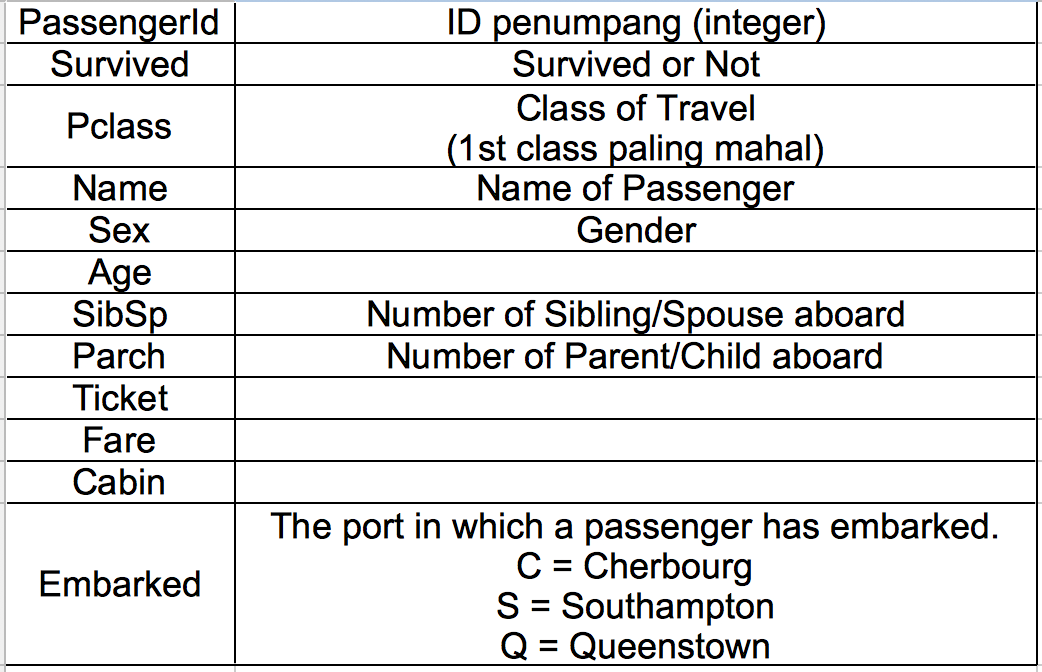

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#drop kolom yang tidak berpengaruh
df.drop(columns=["Name","Ticket"], inplace=True)

# Quick Exploratory Data Analysis (Quick EDA)

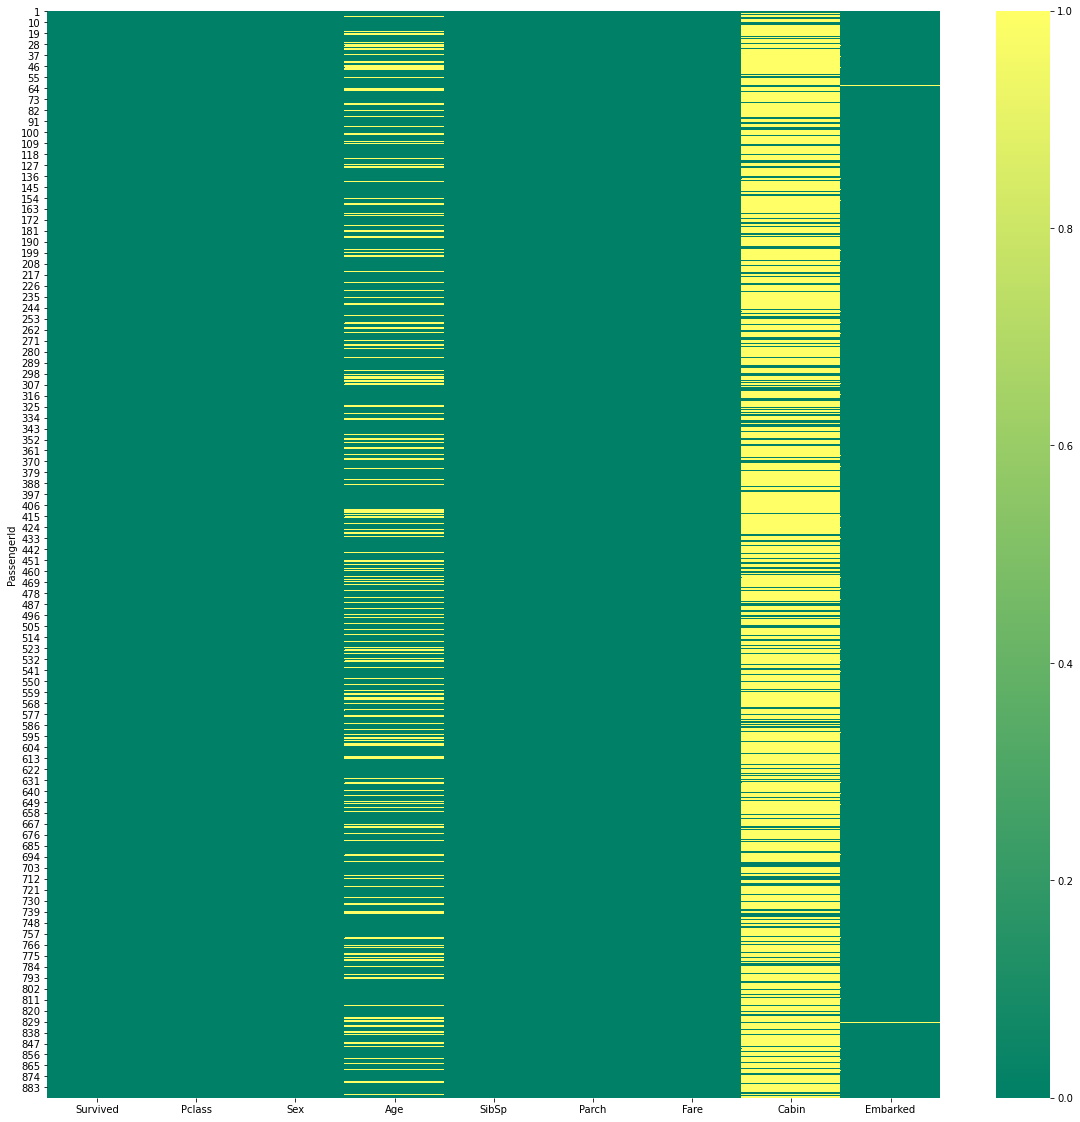

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), cmap='summer');

In [40]:
#Menghapus Kolom yang banyak miss value
df.drop(columns=["Age","Cabin"],inplace=True)

In [41]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
#fungsi fillna() untuk menambahkan Embarked yang kosong menjadi S, salah satu cara mengatasi missing value dgn mengisi nilai modus
df.fillna({"Embarked":"S"},inplace=True)

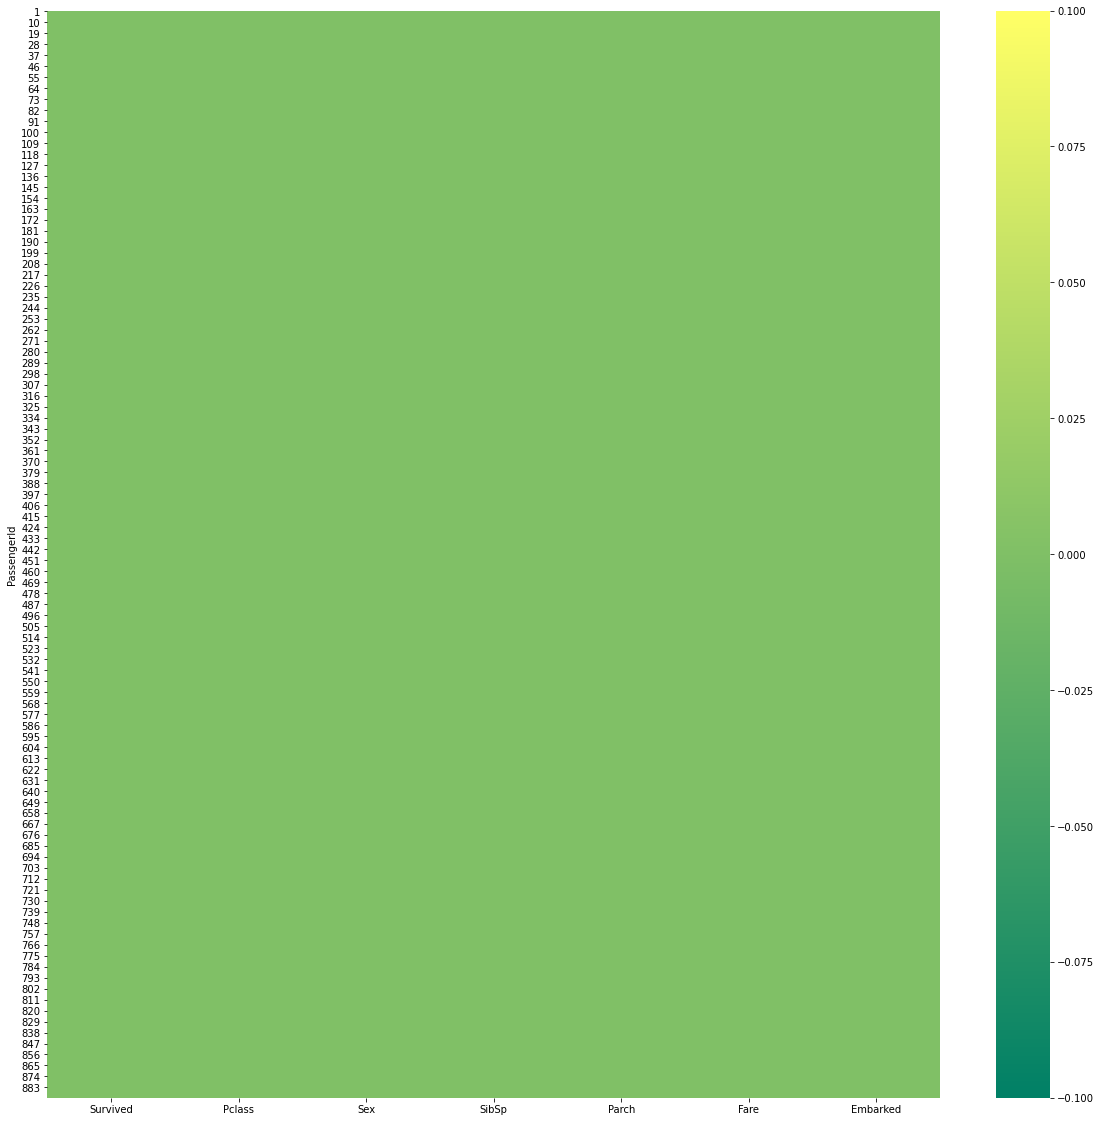

In [43]:
#hasil setelah missing value diatasi
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), cmap='summer');

# Persiapan Data

In [47]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [57]:
X = df.drop(columns="Survived") #menseleksi semua data, dan menghapus kolom survived. karna kolom tersebut akan menjadi target
y = df.Survived #target (lable)

#encode data kategorikal menjadi numerik menggynakan one hart
X = pd.get_dummies(X, columns=["Pclass","Sex","Embarked"])

# Intro Scikit-learn

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

#training menggunakan fungsi fit() atau fitting dan masukan X,y
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [61]:
#melihat akurasi
knn.score(X,y)

0.8933782267115601

# Concept 1 : Dataset Splitting

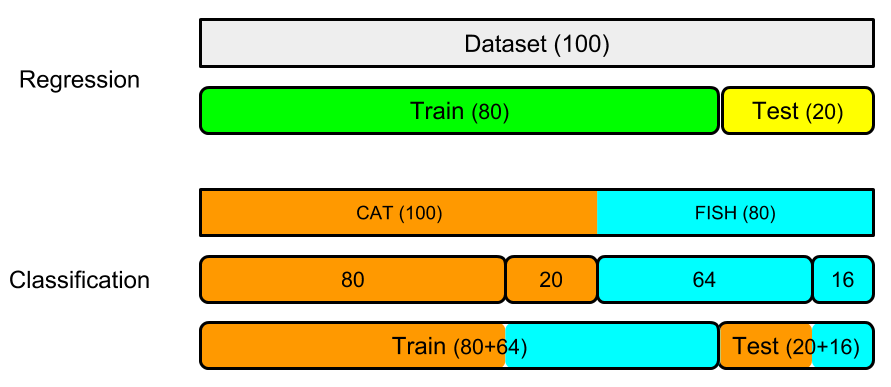

In [63]:
illustration.train_test_split
#shuffle split >> regresi
#stratified shuffle split >> Classification

In [64]:
from sklearn.model_selection import train_test_split

In [75]:
#spliting data
X = df.drop(columns="Survived") #menseleksi semua data, dan menghapus kolom survived. karna kolom tersebut akan menjadi target
y = df.Survived #target (lable)

#encode data kategorikal menjadi numerik menggunakan one hart
X = pd.get_dummies(X, columns=["Pclass","Sex","Embarked"])

#melakukan splitting 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#melihat hasil splitting 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [76]:
#melakukan training masukan X_train dan y_train
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [79]:
#lihatlah apakah akurasinya overfit, underfit??
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.9157303370786517, 0.7039106145251397)

# Concept 2: K-Fold Cross Validation

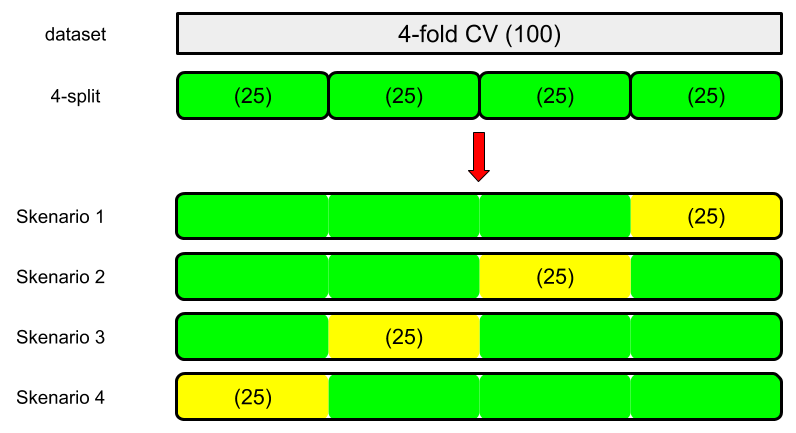

In [80]:
illustration.kfold_cv

In [81]:
from sklearn.model_selection import cross_val_score

In [112]:
knn = KNeighborsClassifier(n_neighbors=1)
#membuat model dan splitting menjadi 5 bagian (K-fold = 5) dan pada umumnya 3-5
cross_val_score(knn, X,y, cv=5)

array([0.62569832, 0.65168539, 0.83146067, 0.7752809 , 0.74719101])

In [113]:
cross_val_score(knn, X,y, cv=5).mean()

0.7262632603100874

# Improve Model

### Improve Melalui Data

### Improve Melalui Model

## Improvement Melalui Data - Feature Scaling

In [116]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

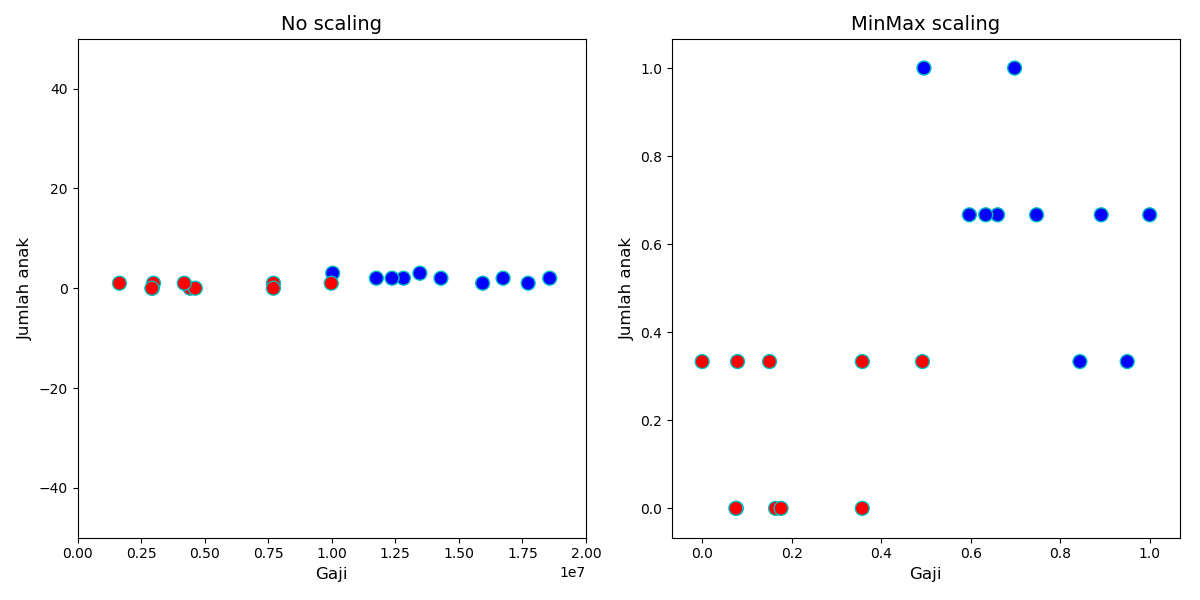

In [117]:
illustration.knn_scaling

In [176]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
#menyiapkan scaler
scaler = MinMaxScaler()

#scalernya difit untuk mencari min,max dari data
scaler.fit(X_train)

#jika sudah menemukan max dan min baru ditransform dan test tidak boleh difit atau dipelajari serta minmaxnya dari data train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [187]:
knn = KNeighborsClassifier(n_neighbors=1)
#melakukan training
knn.fit(X_train_scaled, y_train)

#akurasi train dan test >> lihat overfit atau underfit??
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9157303370786517, 0.7150837988826816)

### Improvement Melalui Model: Parameter Tuning

Mencari model yg baik contohnya menentukan jumlah tetangga terdekat 3,5,atau 7 dst menggunakan loop ...

## Tuning n_neighbor tanpa scalling  

Maksimum Test Score: 0.7541899441340782
K-Neighbor Terbaik : 3


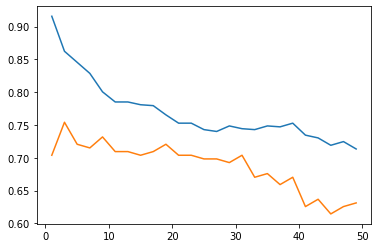

In [199]:
#inisisalisasi penggunaan tetangga yang akan dipakai (N)
neighbor = range(1, 50, 2)

#setiap kali loop, menyimpan score pada array
train_score = []
test_score = []

#buat fungsi loop u/ neighbornya dimulai dari 1,3,5 .... ke-n(50)
for k in neighbor:
    #inisialisasi model knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #setiap kali loop,akan menyimpan score pada array []
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

#ploting score train dan test
plt.plot(neighbor, train_score, label="train");
plt.plot(neighbor, test_score, label="test");

#Melihat score test terbaik dari semua score test yg didapatkan
print(f'Maksimum Test Score: {np.max(test_score)}')

#Melihat K-Neighbor terbaik dari semua data test dengan argmax
print(f'K-Neighbor Terbaik : {neighbor[np.argmaxmax(test_score)]}')

## Tuning n_neighbor menggunakan scalling (Euclidian = p2)

Maksimum Test Score: 0.7988826815642458
K-Neighbor Terbaik : 29


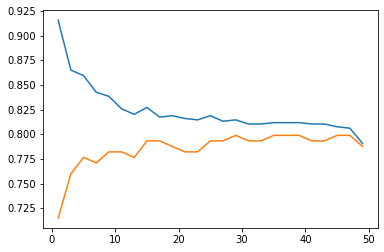

In [205]:
#inisisalisasi penggunaan tetangga yang akan dipakai (N)
neighbor = range(1, 50, 2)

#setiap kali loop, menyimpan score pada array
train_score = []
test_score = []

#buat fungsi loop u/ neighbornya dimulai dari 1,3,5 .... ke-n(50)
for k in neighbor:
    #inisialisasi model knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    #setiap kali loop,akan menyimpan score pada array []
    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

#ploting score train dan test
plt.plot(neighbor, train_score, label="train");
plt.plot(neighbor, test_score, label="test");

#Melihat score test terbaik dari semua score test yg didapatkan
print(f'Maksimum Test Score: {np.max(test_score)}')

#Melihat K-Neighbor terbaik dari semua data test dengan argmax
print(f'K-Neighbor Terbaik : {neighbor[np.argmax(test_score)]}')

## Tuning n_neighbor menggunakan scalling dan weight distance (Jarak)

Maksimum Test Score: 0.7988826815642458
K-Neighbor Terbaik : 49


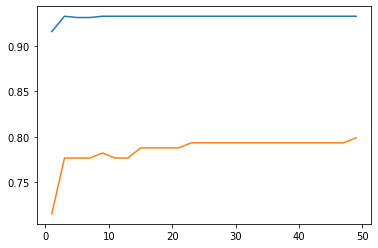

In [202]:
#inisisalisasi penggunaan tetangga yang akan dipakai (N)
neighbor = range(1, 50, 2)

#setiap kali loop, menyimpan score pada array
train_score = []
test_score = []

#buat fungsi loop u/ neighbornya dimulai dari 1,3,5 .... ke-n(50)
for k in neighbor:
    #inisialisasi model knn
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    
    #setiap kali loop,akan menyimpan score pada array []
    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

#ploting score train dan test
plt.plot(neighbor, train_score, label="train");
plt.plot(neighbor, test_score, label="test");

#Melihat score test terbaik dari semua score test yg didapatkan
print(f'Maksimum Test Score: {np.max(test_score)}')

#Melihat K-Neighbor terbaik dari semua data test dengan argmax
print(f'K-Neighbor Terbaik : {neighbor[np.argmax(test_score)]}')

## Tuning n_neighbor menggunakan scalling dan weight manhattan distance

Maksimum Test Score: 0.7932960893854749
K-Neighbor Terbaik : 23


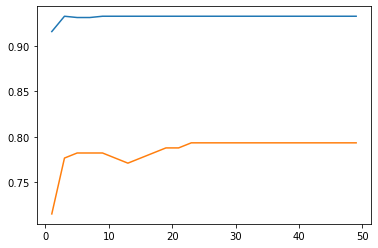

In [172]:
#inisisalisasi penggunaan tetangga yang akan dipakai (N)
neighbor = range(1, 50, 2)

#setiap kali loop, menyimpan score pada array
train_score = []
test_score = []

#buat fungsi loop u/ neighbornya dimulai dari 1,3,5 .... ke-n(50)
for k in neighbor:
    #inisialisasi model knn
    knn = KNeighborsClassifier()
    knn.fit(X_train_scaled, y_train)
    
    #setiap kali loop,akan menyimpan score pada array []
    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))

#ploting score train dan test
plt.plot(neighbor, train_score, label="train");
plt.plot(neighbor, test_score, label="test");

#Melihat score test terbaik dari semua score test yg didapatkan
print(f'Maksimum Test Score: {np.max(test_score)}')

#Melihat K-Neighbor terbaik dari semua data test dengan argmax
print(f'K-Neighbor Terbaik : {neighbor[np.argmax(test_score)]}')